<a href="https://colab.research.google.com/github/Soichiro-Gardinner/Insurance_Hypothesis_testing/blob/main/Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency, f_oneway
import matplotlib.pyplot as plt

# Load the insurance dataset
insurance_df = pd.read_csv('/content/insurance - insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


- **Q1**: Do smokers have higher insurance charges than non-smokers?
- **Null Hypothesis**: There is no significant difference in insurance charges between smokers and non-smokers.
- **Alternative Hypothesis**: Smokers have higher insurance charges than non-smokers.

In [ ]:
# Selecting the appropriate test: Independent t-test
smokers_charges = insurance_df[insurance_df['smoker'] == 'yes']['charges']
non_smokers_charges = insurance_df[insurance_df['smoker'] == 'no']['charges']

**Testing the assumptions**: Normality assumption

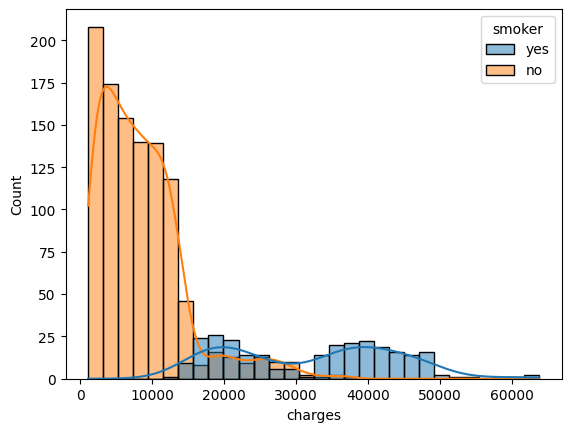

Reject the null hypothesis. Smokers have higher insurance charges than non-smokers.


In [ ]:
# Visualize the distribution of charges for smokers and non-smokers
sns.histplot(data=insurance_df, x='charges', hue='smoker', kde=True)
plt.show()

# Execute the test
t_stat, p_value = ttest_ind(smokers_charges, non_smokers_charges)

# Interpret the result
if p_value < 0.05:
    print("Reject the null hypothesis. Smokers have higher insurance charges than non-smokers.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in insurance charges between smokers and non-smokers.")


- **Q2**: Are men more likely to smoke than women?
- **Null Hypothesis**: There is no significant difference in smoking habits between men and women.
- **Alternative Hypothesis**: Men are more likely to smoke than women.

In [ ]:
# Selecting the appropriate test: Chi-square test
smoker_gender_table = pd.crosstab(insurance_df['smoker'], insurance_df['sex'])

**Testing the assumptions:** None

In [ ]:
# Execute the test
chi2_stat, p_value, _, _ = chi2_contingency(smoker_gender_table)

# Interpret the result
if p_value < 0.05:
    print("Reject the null hypothesis. Men are more likely to smoke than women.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in smoking habits between men and women.")

Reject the null hypothesis. Men are more likely to smoke than women.


 - **Q3**: Do different regions have different charges, on average?
 - **Null Hypothesis**: There is no significant difference in insurance charges among different regions.
 - **Alternative Hypothesis**: There is a significant difference in insurance charges among different regions.


In [ ]:
# Selecting the appropriate test: Analysis of Variance (ANOVA)
region_groups = insurance_df.groupby('region')['charges']
region_groups

**Testing the assumptions**: Normality assumption

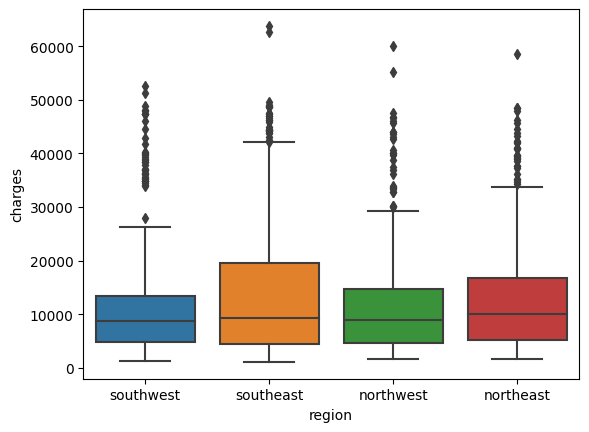


Reject the null hypothesis. Different regions have different charges, on average.


In [ ]:
# Visualize the distribution of charges for each region
sns.boxplot(data=insurance_df, x='region', y='charges')
plt.show()

# Execute the test
f_stat, p_value = f_oneway(*[group for _, group in region_groups])

# Interpret the result
if p_value < 0.05:
    print("\nReject the null hypothesis. Different regions have different charges, on average.")
else:
    print("\nFail to reject the null hypothesis. There is no significant difference in charges among different regions.")